# Porto Seguro's Safe Driver Prediction

# Data Preparation and Explotaration

https://www.kaggle.com/bertcarremans/data-preparation-exploration

### Loading Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

### Loading Data

In [3]:
train = pd.read_csv('data/porto_train.csv')
test = pd.read_csv('data/porto_test.csv')

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
train.shape

(595212, 59)

In [7]:
train.drop_duplicates()
train.shape

(595212, 59)

In [8]:
test.shape

(892816, 58)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
train.dtypes.value_counts()

int64      49
float64    10
dtype: int64

### Metadata

In [11]:
data=[]

for f in train.columns:
    # role 정의
    if f=='target':
        role='target'
    elif f=='id':
        role='id'
    else:
        role='input'
        
    # level 정의
    if 'bin' in f or f=='target':
        level='binary'
    elif 'cat' in f or f=='id':
        level='nominal'
    elif train[f].dtype==float:
        level='interval'
    else:
        level='ordinal'
        
    # id를 제외한 나머지는 keep에 True값 지정
    keep=True
    if f=='id':
        keep=False
        
    # 데이터타입 정의
    dtype=train[f].dtype
    
    # 모든 metadata를 포함하고있는 딕셔너리를 만든다.
    f_dict={
        'varname':f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype':dtype
    }
    data.append(f_dict)
    
meta=pd.DataFrame(data,columns=['varname','role','level','keep','dtype'])
meta.set_index('varname',inplace=True)

In [12]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [13]:
meta[(meta['level'] == 'nominal') & (meta['keep'])].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [14]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics

### interval variable

In [15]:
v = meta[(meta['level'] == 'interval') & (meta['keep'])].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### ordinal variable

In [16]:
v = meta[(meta['level'] == 'ordinal') & (meta['keep'])].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


### binary variable

In [17]:
v = meta[(meta['level'] == 'binary') & (meta['keep'])].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Handling imbalanced classes

target=1 인것의 비율이 target=0보다 매우 적다. 

이로인해 accuracy가 좋을순있다.

이 문제를 해결하기위해서 아래 두가지 전략이 있다.

* target=1 인 record를 oversampling한다
* target=0 인 record를 undersampling한다

우리의 경우 training set 데이터수가 많기때문에 undersampling하는 방법으로 가려고한다.

oversampling and undersampling : https://hwiyong.tistory.com/266

In [36]:
desired_apriori = 0.10

idx_0 = train[train['target'] == 0].index
idx_1 = train[train['target'] == 1].index

nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

undersampling_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)
print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of records with target = 0 after undersamplig : {}'.format(undersampled_nb_0))

undersampled_idx = shuffle(idx_0, random_state = 37, n_samples = undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)

train = train.loc[idx_list].reset_index(drop = True)

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target = 0 after undersamplig : 195246


## Data quality Checks

Missing values를 체크해보자 (-1로 되어있음)

In [18]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} recodrs ({:.2%}) with missing values'.format(f, missings, missings_perc))
print('\nIn total, there are {} varialbes with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 recodrs (0.05%) with missing values
Variable ps_ind_04_cat has 51 recodrs (0.02%) with missing values
Variable ps_ind_05_cat has 2256 recodrs (1.04%) with missing values
Variable ps_reg_03 has 38580 recodrs (17.78%) with missing values
Variable ps_car_01_cat has 62 recodrs (0.03%) with missing values
Variable ps_car_02_cat has 2 recodrs (0.00%) with missing values
Variable ps_car_03_cat has 148367 recodrs (68.39%) with missing values
Variable ps_car_05_cat has 96026 recodrs (44.26%) with missing values
Variable ps_car_07_cat has 4431 recodrs (2.04%) with missing values
Variable ps_car_09_cat has 230 recodrs (0.11%) with missing values
Variable ps_car_11 has 1 recodrs (0.00%) with missing values
Variable ps_car_14 has 15726 recodrs (7.25%) with missing values

In total, there are 12 varialbes with missing values


결측치가 너무 많은 변수는 제거하고, 일부이면 평균 또는 최빈값으로 대치

ps_car_03_cat 변수와 ps_car_05_cat 변수는 결측치가 각각 68%, 44%로 너무 많으므로 제거

나머지 categorical 변수들의 결측치는 유지

- ps_reg_03(continuous) 변수는 18%가 결측치이므로, 평균으로 대치

- ps_car_11(ordinal) 변수는 1개의 record만 결측이므로 최빈값으로 대치

- ps_car_14(continuous) 변수는 7%가 결측치이므로 평균값으로 대치

In [19]:
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, axis = 1, inplace = True)
meta.loc[(vars_to_drop), 'keep'] = False

In [20]:
mean_imp = SimpleImputer(missing_values = -1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values = -1, strategy = 'most_frequent')


# 다차원 배열을 1차원 배열로 평평하게 펴주는 Numpy의 ravel() 함수
# ex) array([[0.83], [0.72]]) -> array([0.83], [0.72])

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

## Checking the cardinality of the categorical variables

Cardinality는 변수 안에 서로 다른 unique한 값의 개수를 말함.

categorical 변수에 많은 distinct value가 있으면 더미변수 개수가 너무 많아질 수 있음.

In [21]:
v = meta[(meta['level'] == 'nominal') & (meta['keep'])].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    # dist_value = train[feature].nunique()
    
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [22]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    # assert : 맞으면 True 반환, 틀리면 오류.
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [23]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'],
                                           test['ps_car_11_cat'],
                                           target = train['target'],
                                           min_samples_leaf=100,
                                           smoothing=10,
                                           noise_level=0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis = 1, inplace = True)
meta.loc['ps_car_11_cat', 'keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis = 1, inplace = True)

# EDA

### 1) categorical

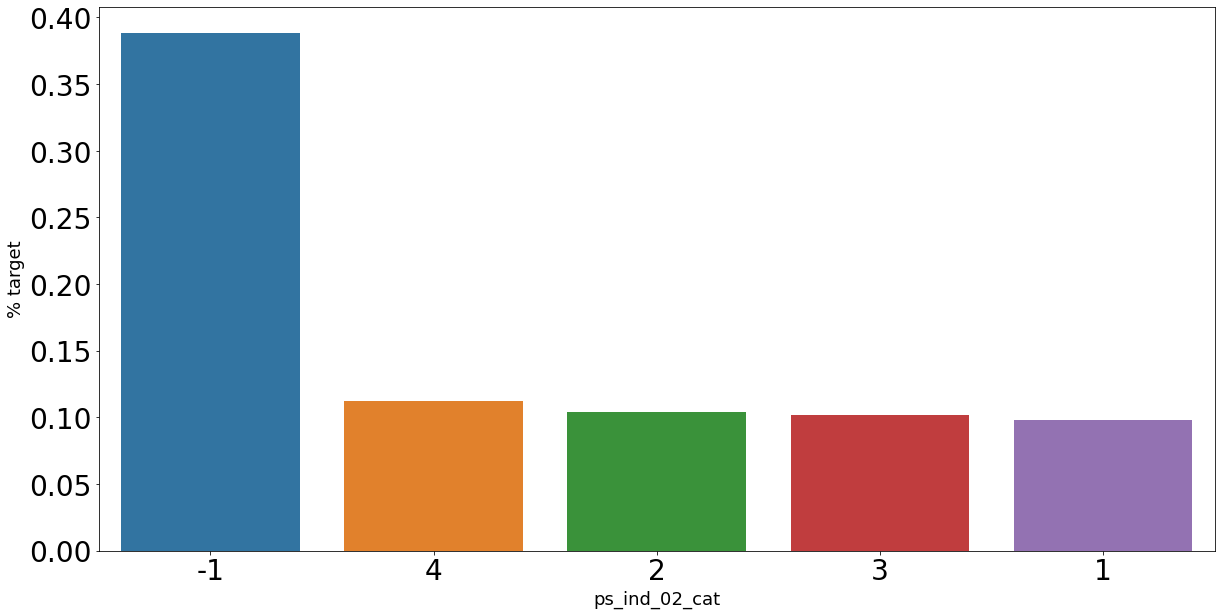

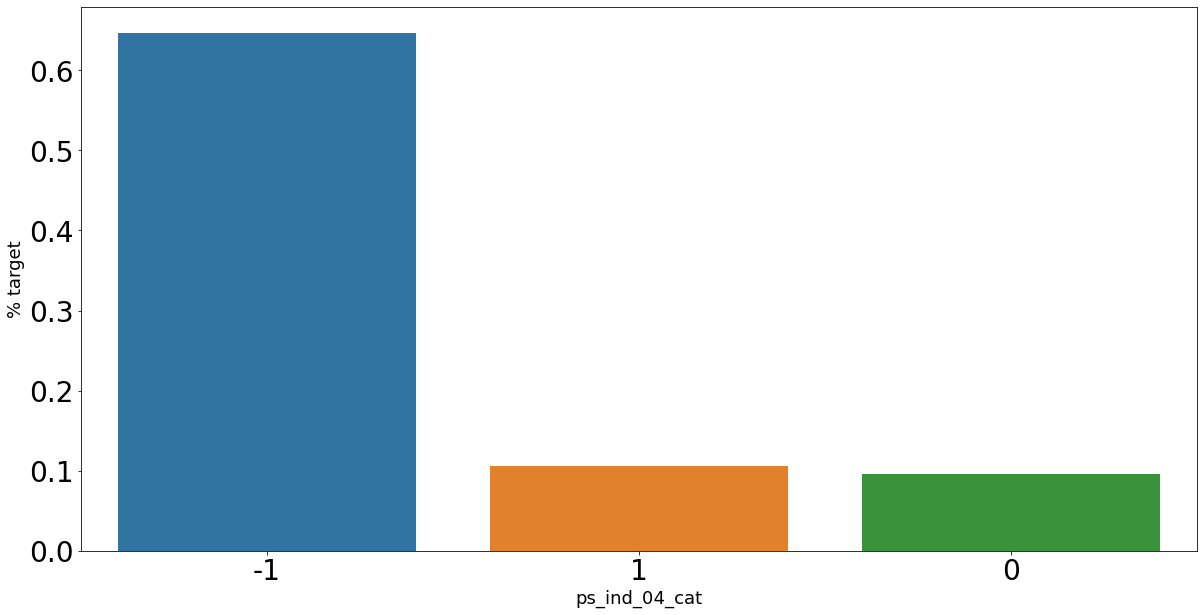

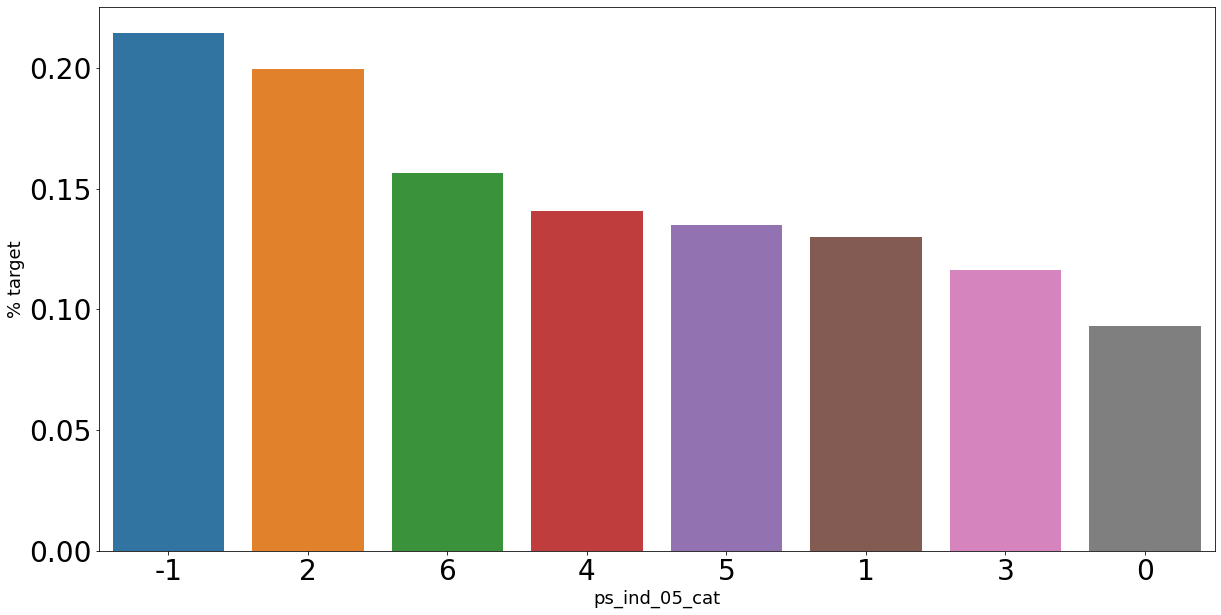

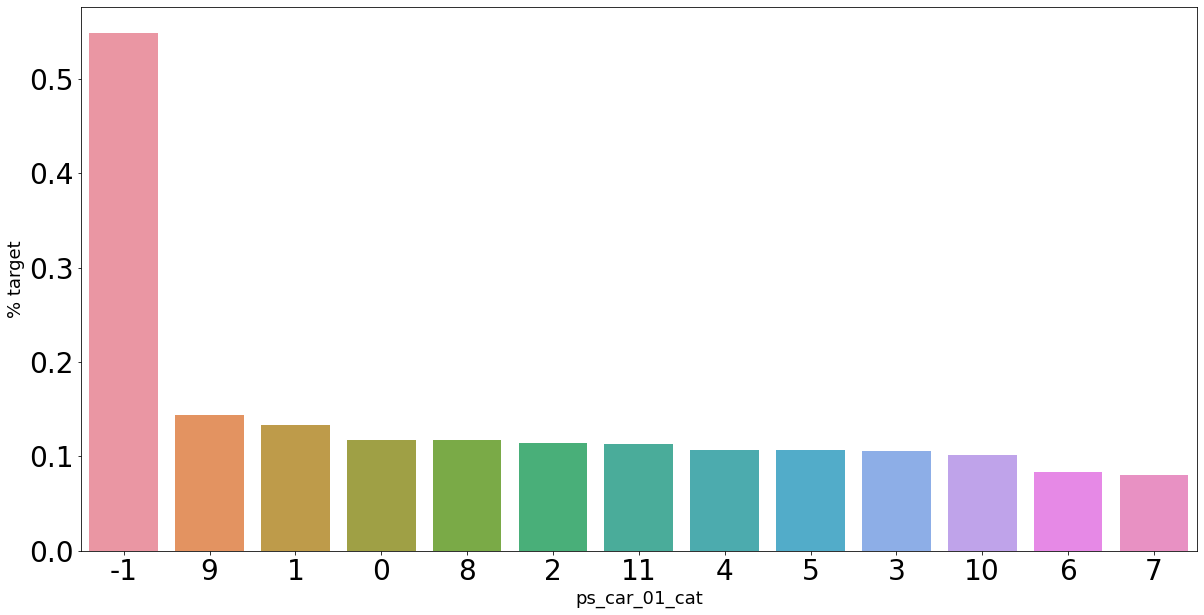

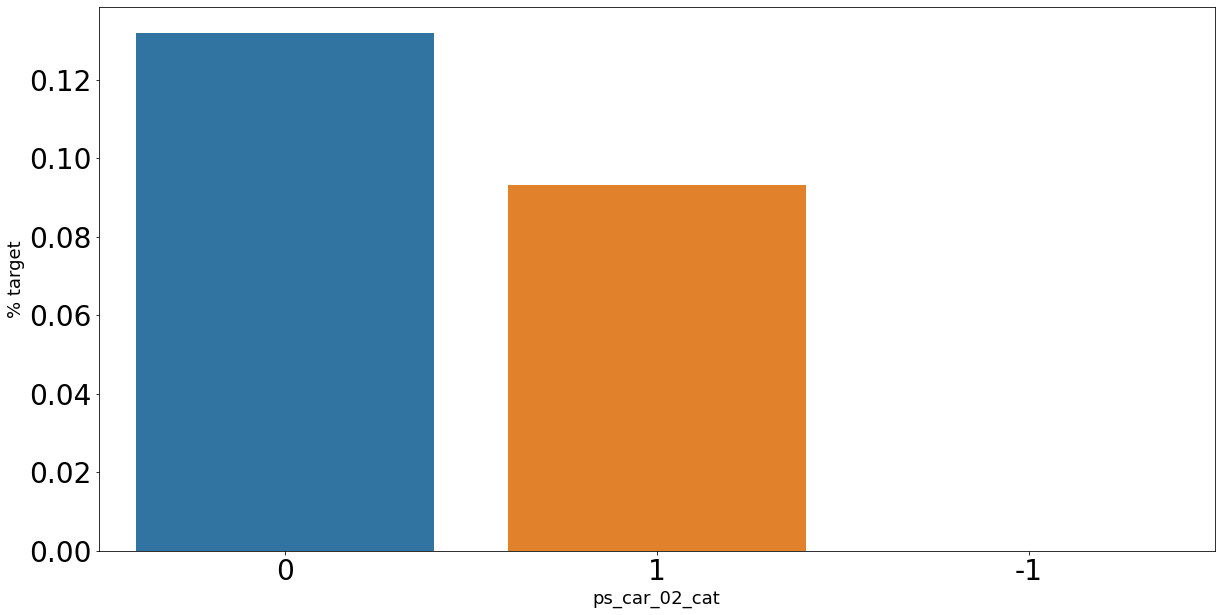

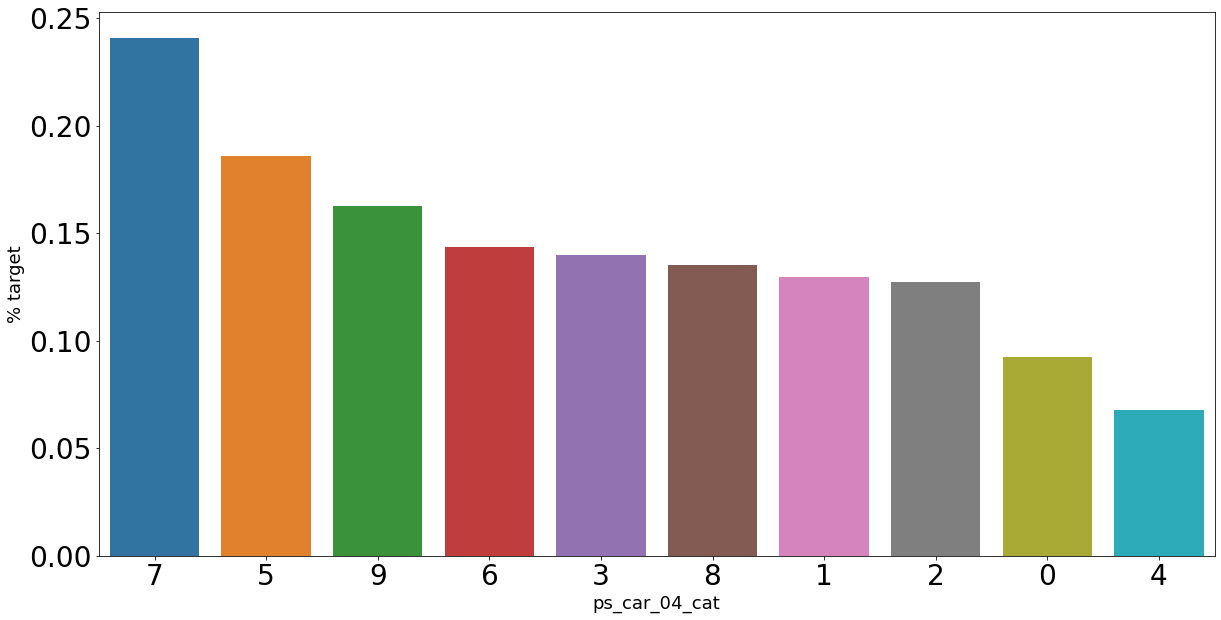

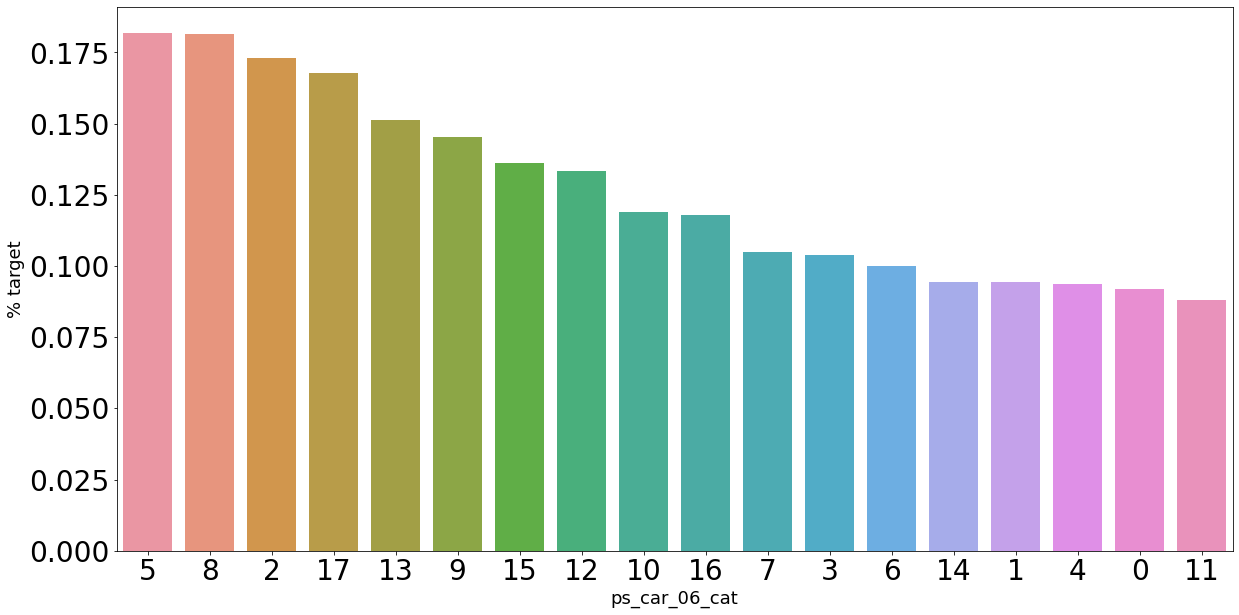

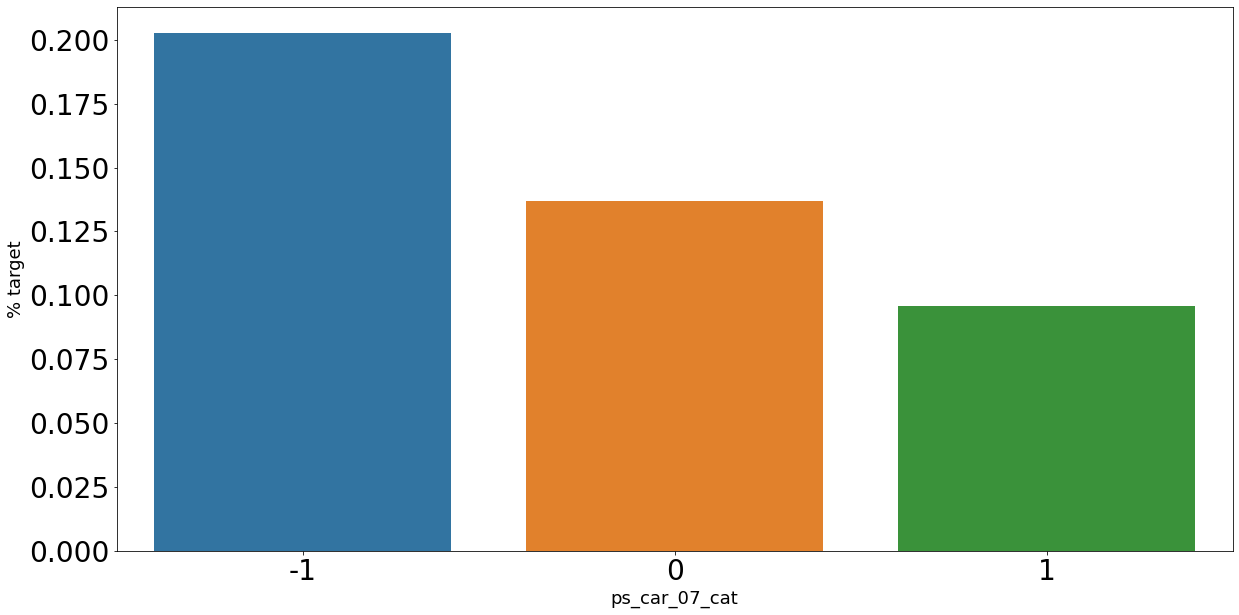

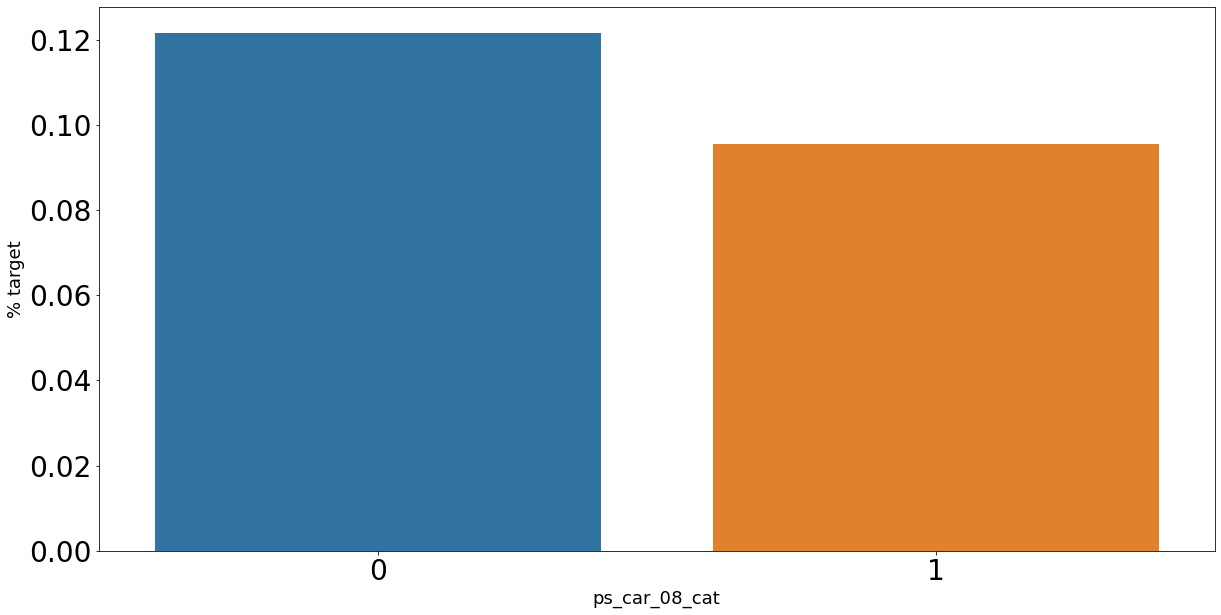

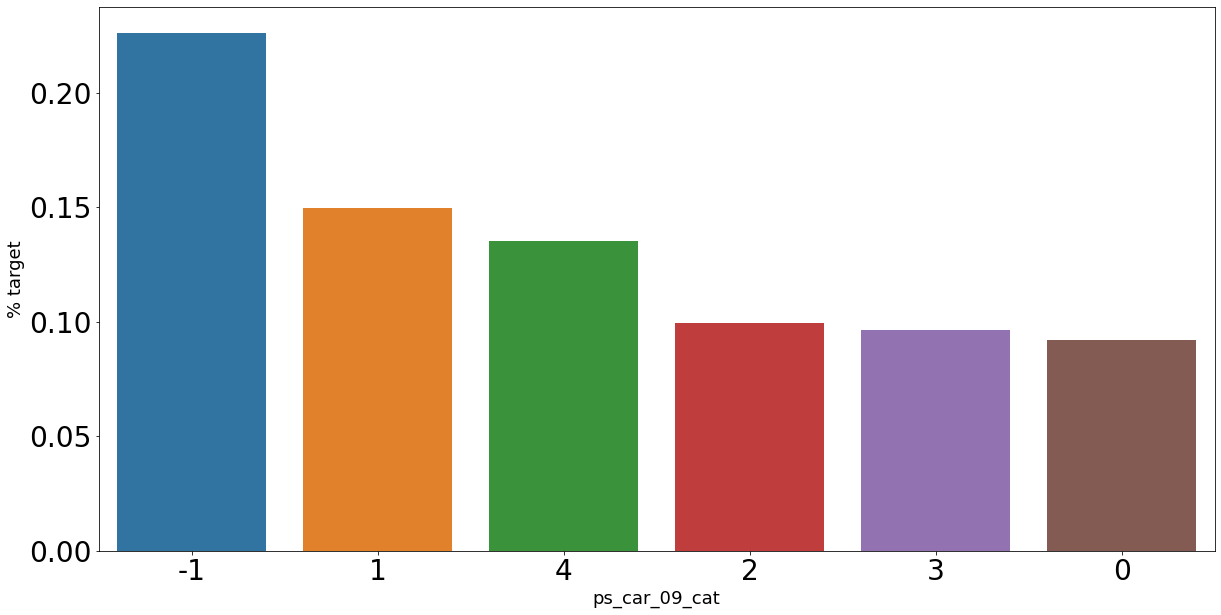

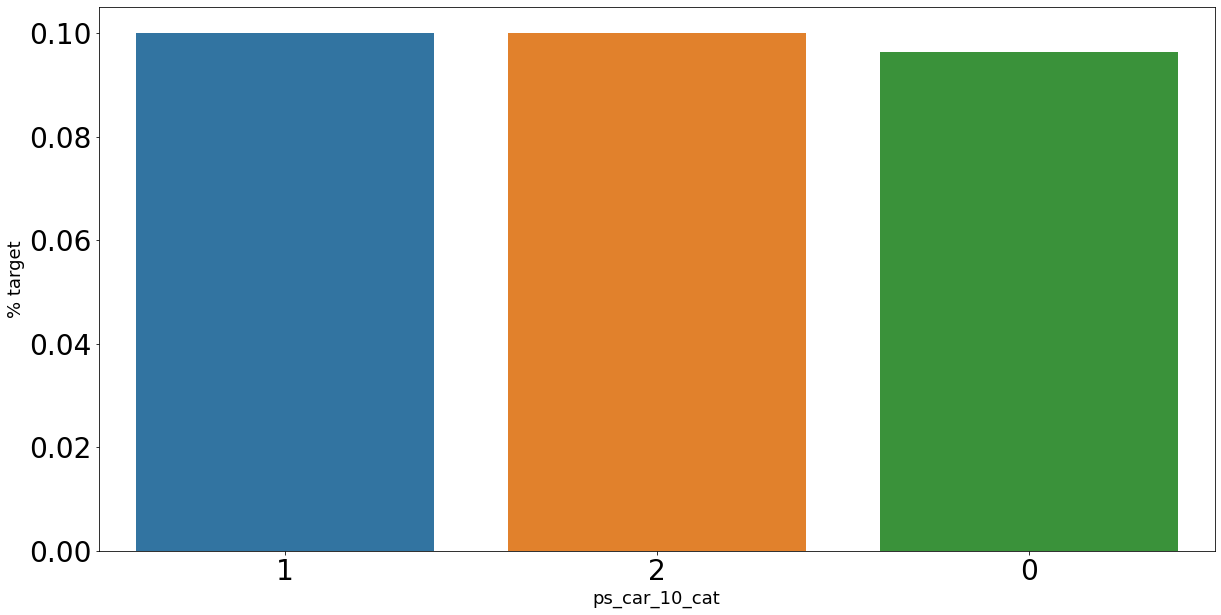

In [24]:
v = meta[(meta['level'] == 'nominal') & (meta['keep'])].index

for f in v:
    plt.figure
    fig, ax = plt.subplots(figsize = (20,10))
    cat_perc = train[[f, 'target']].groupby([f], as_index = False).mean()
    cat_perc.sort_values('target', ascending = False, inplace = True)
    
    sns.barplot(ax = ax, x = f, y = 'target', data = cat_perc, order = cat_perc[f])
    plt.ylabel('% target', fontsize = 18)
    plt.xlabel(f, fontsize = 18)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 28)
    
    if f == 'ps_car_11_cat':
        plt.xticks(rotation = 45, fontsize = 10)
    plt.show()

결측치를 최빈값으로 대치하지 않고, 카테고리 값으로 분리해서 살펴본것은 바람직했던 것으로 보인다.

결측치가 있는 고객들은 보험청구를 요구했을 가능성이 더 높은것으로 나타났다. (어떤경우는 낮기도함)

### 2) Interval variables

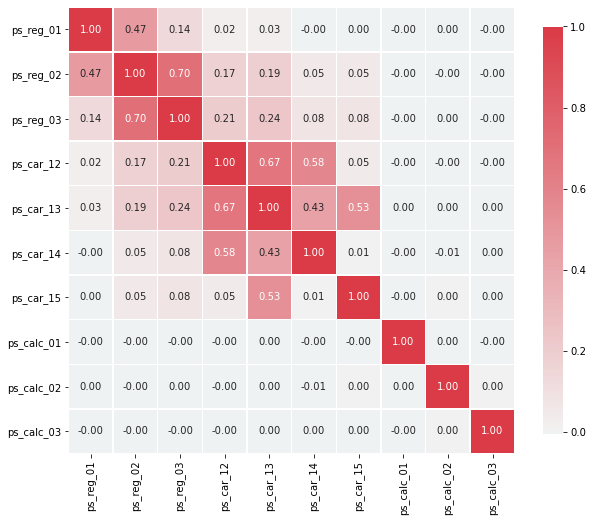

In [25]:
def corr_heatmap(v):
    correlations = train[v].corr()
    
    cmap = sns.diverging_palette(200,10 , as_cmap = True)
    
    fig,ax = plt.subplots(figsize = (10,10))
    
    # cbar_kws = heatmap 옆 사이드바
    sns.heatmap(correlations, cmap = cmap, vmax = 1.0, center = 0, fmt = '.2f', square = True, linewidth = .5, annot = True, cbar_kws = {'shrink' : 0.75})
    plt.show()
    
    
v = meta[(meta['level'] == 'interval') & (meta['keep'])].index
corr_heatmap(v)

변수간에 상관관계가 높은 변수들이 있는것을 확인할 수 있다.

- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.53)

In [26]:
# sample로 10%만 추출

s = train.sample(frac = 0.1)
s.shape

(21694, 57)

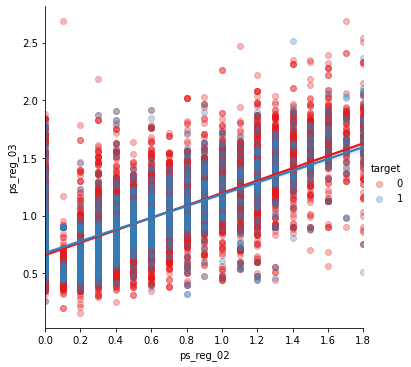

In [27]:
sns.lmplot(x = 'ps_reg_02', y = 'ps_reg_03', data = s, hue = 'target', palette='Set1', scatter_kws = {'alpha' : 0.3})
plt.show()

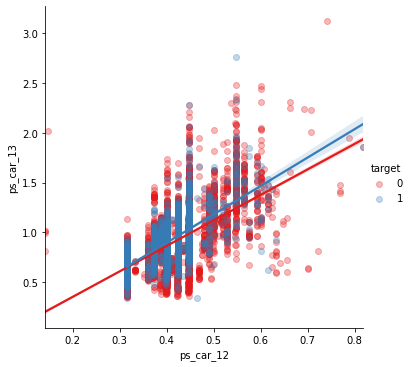

In [28]:
sns.lmplot(x = 'ps_car_12', y = 'ps_car_13', data = s, hue = 'target', palette='Set1', scatter_kws = {'alpha' : 0.3})
plt.show()

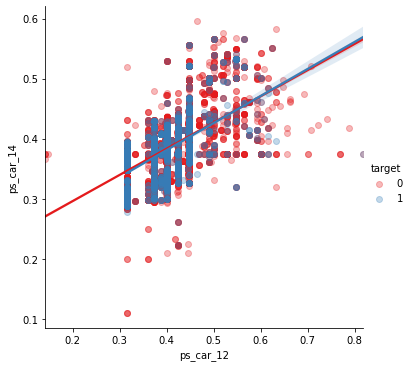

In [29]:
sns.lmplot( x= 'ps_car_12', y = 'ps_car_14', data = s, hue = 'target', palette='Set1', scatter_kws = {'alpha' : 0.3})
plt.show()

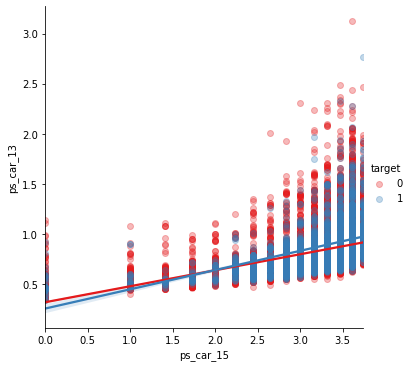

In [30]:
sns.lmplot(x = 'ps_car_15', y = 'ps_car_13', data = s, hue = 'target', palette='Set1', scatter_kws = {'alpha' : 0.3})
plt.show()

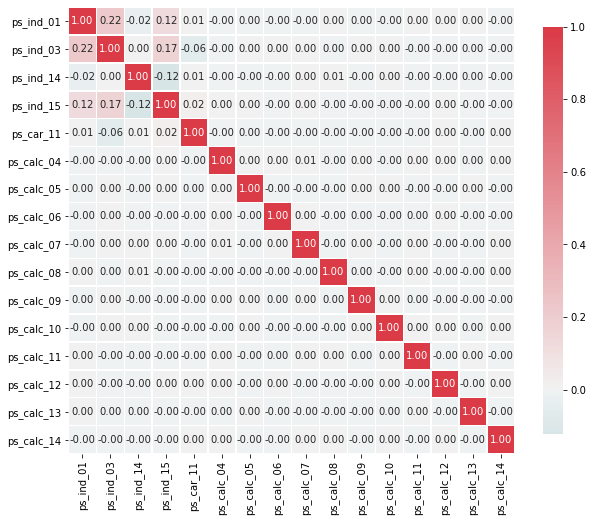

In [31]:
v = meta[(meta['level'] == 'ordinal') & (meta['keep'])].index
corr_heatmap(v)

## Feature Engineering

### 1) get_dummies

In [32]:
v=meta[(meta['level']=='nominal') & (meta['keep'])].index
print('더미화 하기전에 train데이터에 {}개의 변수가 있다'.format(train.shape[1]))
train=pd.get_dummies(data = train, columns=v, drop_first= True)
print('더미화 한 후에 train데이터에 {}개의 변수가 있다'.format(train.shape[1]))

더미화 하기전에 train데이터에 57개의 변수가 있다
더미화 한 후에 train데이터에 109개의 변수가 있다


### 2) interaction 변수 만들기 (다항회귀)

https://chana.tistory.com/entry/핸즈온-머신러닝5-다항-회귀

사이킷런의 PolynomialFeatures를 사용하여 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가한 훈련 데이터를 만들어보자

Q : 어떤 경우에 2차항 변수를 만들고, 왜 만드는가 ?

A : 데이터들간의 형태가 비선형일때 데이터에 각 특성의 제곱을 추가해서 특성이 추가된 비선형 데이터를 선형회귀 모델로 훈련시키는 방법

#### Polynomial

In [33]:
 X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [34]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

In [35]:
poly = PolynomialFeatures(degree = 2, include_bias=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [36]:
v = meta[(meta['level'] == 'interval') & (meta['keep'])].index

# interaction_only = ab만이 새로운 특성으로 추가됨.
# include_bias  = a^2 + ab + b^꼴

poly = PolynomialFeatures(degree = 2, interaction_only= False, include_bias=False)
interactions = pd.DataFrame(data = poly.fit_transform(train[v]), columns = poly.get_feature_names(v))
msn = poly.get_feature_names(v)
interactions.drop(v, axis = 1, inplace = True)

print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis = 1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


## Feature Selection

### 1) Removing features with low or zero variance

사이킷런의 VarianceThreshold를 이용하면 간편하게 분산이 0인 feature를 제거할 수 있다. 

하지만, 이 경우에는 분산이 0인 변수가 없음. 따라서 분산이 1% 미만인 변수를 제거한다고하면 31개의 변수를 제거할 수 있음.

Q : 분산이 작은 변수를 제거해야하는 이유 ?

A : 예측모델에서 중요한 특성이란, 타겟과의 상관관계가 큰 특성을 의미한다. 
    
그런데 상관관계에 앞서 어떤 특성의 값 자체가 표본에 따라 그다지 변하지 않는다면, 예측에 별 도움이 되지 않을 가능성이 높다.

(ex. 남자를 상대로한 설문조사 데이터에서 남자 라는 성별특성은 무의미함.)

따라서, 표본 변화에 따른 데이터 값의 변화량 즉, 분산이 기준치보다낮은 특성은 제거하는것

In [37]:
selector = VarianceThreshold(threshold = .01)
selector.fit(train.drop(['id', 'target'], axis = 1))

f = np.vectorize(lambda x : not x)

v = train.drop(['id', 'target'], axis = 1).columns[f(selector.get_support())]

# v = train.drop(['id', 'target'], axis = 1).columns[~selector.get_support()]

print('{} variables have too low variance'.format(len(v)))
print('\nThess variables are {}'.format(list(v)))

28 variables have too low variance

Thess variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


### Selecting features with a Random forest and SelectFromModel

In [38]:
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs = -1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

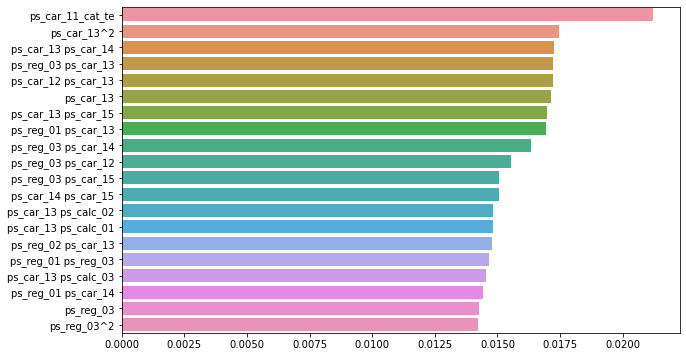

In [39]:
plt.figure(figsize = (10,6))

importances = pd.Series(importances, index = X_train.columns)
importances = importances.sort_values(ascending =False)[:20]
sns.barplot(x = importances.values, y = importances.index)

plt.show()

In [40]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True) # prefit : 이미 학습한 모델을 사용하겠다.
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_feafures = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_feafures))
selected_var = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [41]:
train = train[selected_var + ['target']]

## Feature Scaling

Linear 알고리즘이나, 각 feature의 분포에 영향을 받는 알고리즘과는 달리

Tree 알고리즘은 Feature scaling이 크게 중요하지는 않다.

In [42]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis =1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])